# Imports

In [84]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model load

In [85]:
# sensor_name = 'qing_cheng'
sensor_name = 'vallen'

model_index = 5

In [86]:
model_name_df = pd.read_csv('./Model_Index.csv')
model_name_df.index = model_name_df.index + 1

model_name = model_name_df['nome_do_arquivo'].loc[model_index] if (model_index > 0)  else 'TEST'

print(f'Model file name: {model_name}')
print(f'Model index: {model_index}')

Model file name: position_canal_1_2_normal
Model index: 5


In [87]:
model = load_model(f'./model/{sensor_name}/{model_index}/{model_name}-best_model.h5')

In [88]:
X = np.load(f'./model/{sensor_name}/{model_index}/{model_name}-x.npy')
y = np.load(f'./model/{sensor_name}/{model_index}/{model_name}-y.npy')

In [89]:
y_pred = model.predict(X)

105/105 [==============================] - 1s 9ms/step


In [90]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [91]:
# class_labels = ['No Leakage', 'Leakage']
class_labels = ['No Leakage', 'Leakage in position 2', 'Leakage in position 3', 'Leakage in position 4']

if 1 <= model_index <= 4:
    class_labels = ['No Leakage', 'Leakage']
elif 4 < model_index <= 8:
    class_labels = ['No Leakage', 'Leakage in position 2', 'Leakage in position 3', 'Leakage in position 4']

# Confusion matrix

In [92]:
conf_matrix = confusion_matrix(y, y_pred_classes)

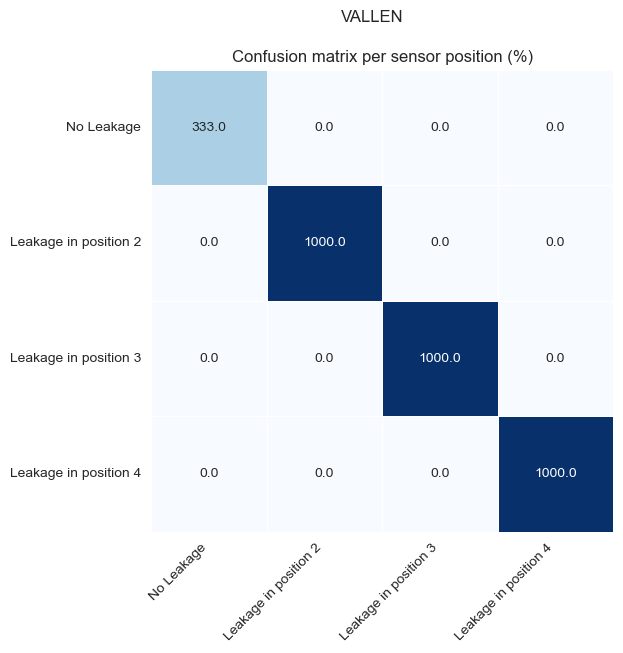

In [93]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='.1f', cbar=False, square=True, linewidths=0.5)

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title('Confusion matrix per sensor position (%)')
plt.suptitle(sensor_name.upper())
plt.show()

# Confusion matrix (%)

In [94]:
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

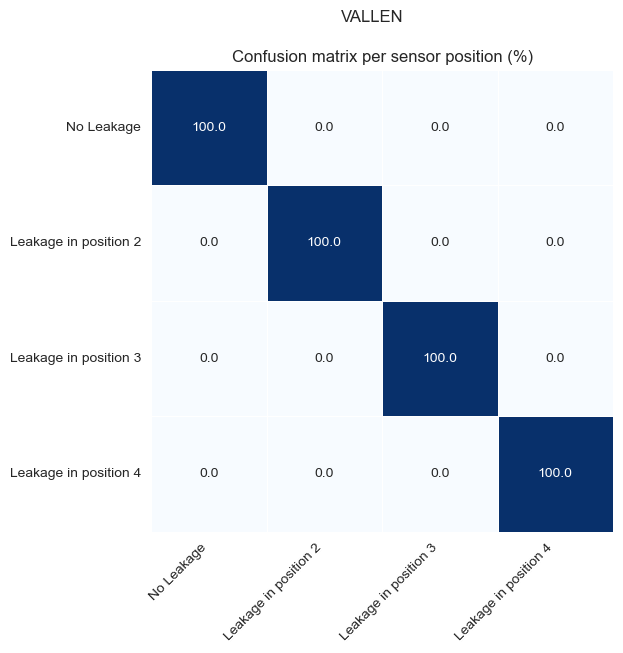

In [95]:
conf_matrix_df = pd.DataFrame(conf_matrix_percent, index=class_labels, columns=class_labels)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='.1f', cbar=False, square=True, linewidths=0.5)

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title('Confusion matrix per sensor position (%)')
plt.suptitle(sensor_name.upper())
plt.show()

# Precision per position

In [96]:
acc_position_x = [25, 60, 95]
acc_position_y = np.diag(conf_matrix_percent)[1:]

In [97]:
acc_position_y

array([100., 100., 100.])

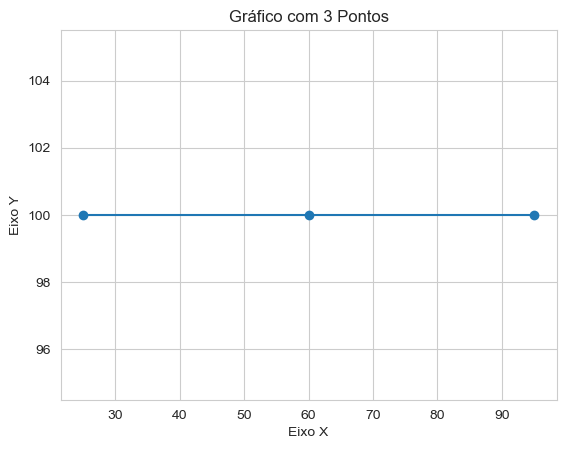

In [98]:
# Criando um gráfico de linha conectando os 3 pontos
plt.plot(acc_position_x, acc_position_y, marker='o')  # 'marker=o' para adicionar marcadores nos pontos

# Adicionar títulos e rótulos dos eixos
plt.title('Gráfico com 3 Pontos')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibir o gráfico
plt.show()

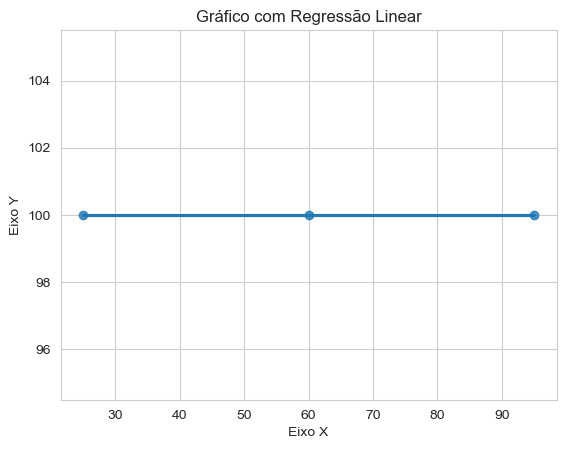

In [99]:
sns.regplot(x=acc_position_x, y=acc_position_y, ci=None)
plt.title('Gráfico com Regressão Linear')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibir o gráfico
plt.show()

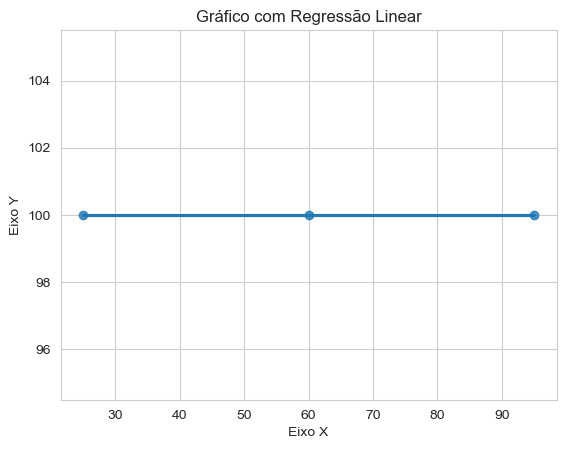

In [100]:
sns.regplot(x=acc_position_x, y=acc_position_y, ci=None, lowess=True)
plt.title('Gráfico com Regressão Linear')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibir o gráfico
plt.show()

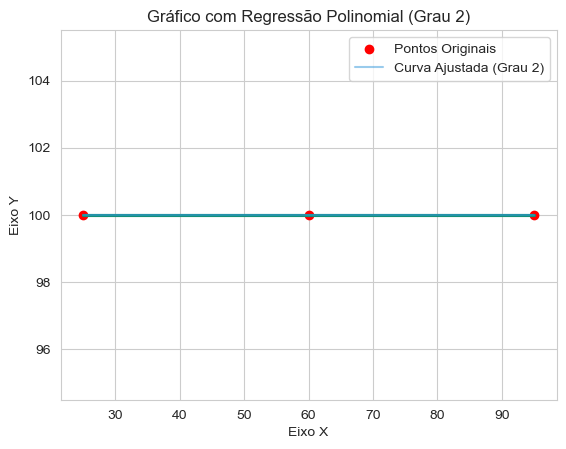

In [101]:
# Ajustando uma curva polinomial de grau 2 (parábola)
coeficientes = np.polyfit(acc_position_x, acc_position_y, 2)  # 2 indica o grau do polinômio
polinomio = np.poly1d(coeficientes)

# Gerar valores de y para os valores de x da curva ajustada
y_ajustado = polinomio(acc_position_x)

# Plotando os pontos e a curva ajustada
plt.scatter(acc_position_x, acc_position_y, color='r', label='Pontos Originais')

sns.regplot(x=acc_position_x, y=acc_position_y, color='#148f77', ci=None, scatter=False)

plt.plot(acc_position_x, y_ajustado, color='#3498db', label='Curva Ajustada (Grau 2)', alpha=0.5)

# Adicionar títulos e rótulos dos eixos
plt.title('Gráfico com Regressão Polinomial (Grau 2)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()

# Exibir o gráfico
plt.show()

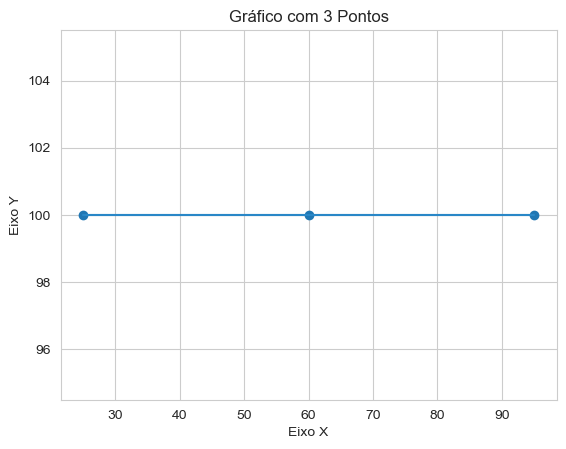

In [102]:
# Ajustando uma curva polinomial de grau 2 (parábola)
coeficientes = np.polyfit(acc_position_x, acc_position_y, 1)  # 2 indica o grau do polinômio
polinomio = np.poly1d(coeficientes)

# Gerar valores de y para os valores de x da curva ajustada
y_ajustado = polinomio(acc_position_x)

# Criando um gráfico de linha conectando os 3 pontos
plt.plot(acc_position_x, acc_position_y, marker='o')  # 'marker=o' para adicionar marcadores nos pontos
plt.plot(acc_position_x, y_ajustado, color='#3498db', label='Curva Ajustada (Grau 2)', alpha=0.5)

# Adicionar títulos e rótulos dos eixos
plt.title('Gráfico com 3 Pontos')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibir o gráfico
plt.show()